In [1]:
import os
import json
import random
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.patches import Ellipse
import numpy as np
import pickle
import pandas as pd
import torch
import torch.nn.functional as F
import re

In [2]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'  

import torch
torch.cuda.empty_cache()

In [3]:
from modules import (
    get_data_from_trajectory_id,
    create_simple_dataloader,
    Step_1,
    Step_2,
    CombinedHamiltonianLayer,
    SimpleStackedHamiltonianNetwork,
    ReverseStep2,
    ReverseStep1,
    ReverseCombinedHamiltonianLayer,
    InverseStackedHamiltonianNetwork,
    prediction_loss,
    prediction_loss_euclidean,
    load_checkpoint,
    count_parameters,
    hsic_loss_statistics_only,
    hsic_loss
    )

In [4]:
from modules import (    
    calculate_phi_A,
    add_phi_A_columns,
    plot_differencies,
    plot_prediction_vs_ground_truth,
    plot_euclidean_distance_over_time,
    test_model_in_single_trajectory,
    analyze_means_with_constants,
    visualize_trajectory_movements_with_std_ellipses,
    visualize_epoch_metrics,
    analyze_folders_means,
    analyze_mapping_net,
    test_model_in_all_trajectories_in_df,
    test_model_variance_in_all_trajectories_in_df,
    plot_prediction_losses,
    plot_variance_losses,
    test_model_with_varying_observed_points,
    test_model_variance_with_varying_observed_points,
    compute_jacobian_functional,
    compute_symplectic_product,
    check_canonical_transformation,
    test_canonical_tranformation_on_trajectory,
    test_model_in_all_trajectories_with_different_single_observation_in_df,
    )

In [5]:
save_dir_path = "./save_directory_7" 


In [6]:
with open("all_dataframes.pkl", "rb") as f:
    loaded_dfs = pickle.load(f)

# Access them like before:
train_df = loaded_dfs['train_df']
val_df = loaded_dfs['val_df']
test_df = loaded_dfs['test_df']

train_id_df = loaded_dfs['train_id_df']
val_id_df = loaded_dfs['val_id_df']
test_id_df = loaded_dfs['test_id_df']

with open("df_high_energy_revised.pkl", "rb") as f:
    df_high_energy_revised = pickle.load(f)

val_df_high_energy_revised = df_high_energy_revised['val_df_high_energy_revised']
val_id_df_high_energy_revised = df_high_energy_revised['val_id_df_high_energy_revised']

test_df_high_energy_revised = df_high_energy_revised['test_df_high_energy_revised']
test_id_df_high_energy_revised = df_high_energy_revised['test_id_df_high_energy_revised']

In [7]:
train_id_df_added = add_phi_A_columns(train_id_df)
val_id_df_added = add_phi_A_columns(val_id_df)
val_id_df_high_energy_revised_added = add_phi_A_columns(val_id_df_high_energy_revised)


📊 Metric summaries:
  Lowest loss of metric 'val_prediction_loss_' recorded in epoch 1008 with the value: 5.9184, the losses of the last 5 epochs are: ['5.9235', '5.9378', '5.9184', '5.9400', '5.9298']
  Lowest loss of metric 'val_variance_loss_high_energy' recorded in epoch 404 with the value: 149.7905, the losses of the last 5 epochs are: ['166.0517', '160.7519', '169.6053', '174.2783', '163.9583']
  Lowest loss of metric 'val_prediction_loss_high_energy' recorded in epoch 841 with the value: 7.5172, the losses of the last 5 epochs are: ['9.0648', '8.8202', '8.7853', '9.4832', '8.8730']
  Lowest loss of metric 'val_variance_loss_training_set' recorded in epoch 1004 with the value: 47.8736, the losses of the last 5 epochs are: ['48.0985', '47.9263', '48.1058', '48.0124', '48.1261']
  Lowest loss of metric 'val_prediction_loss_training_set' recorded in epoch 999 with the value: 5.6621, the losses of the last 5 epochs are: ['5.6674', '5.6669', '5.6730', '5.6664', '5.6632']
  Lowest los

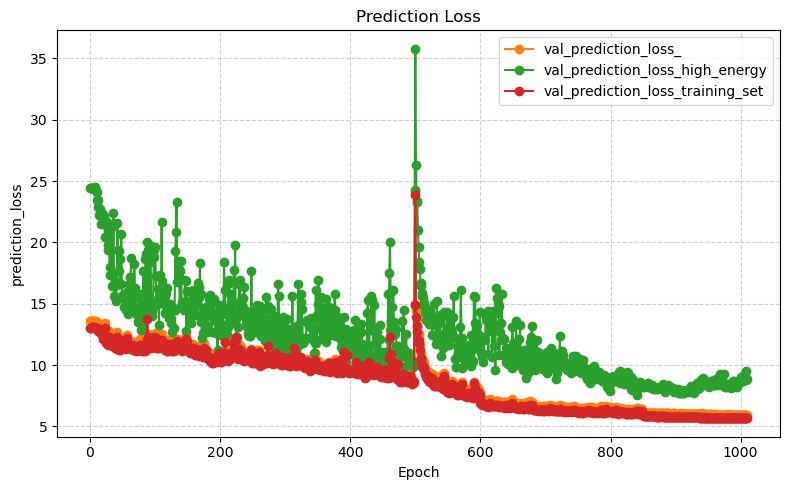

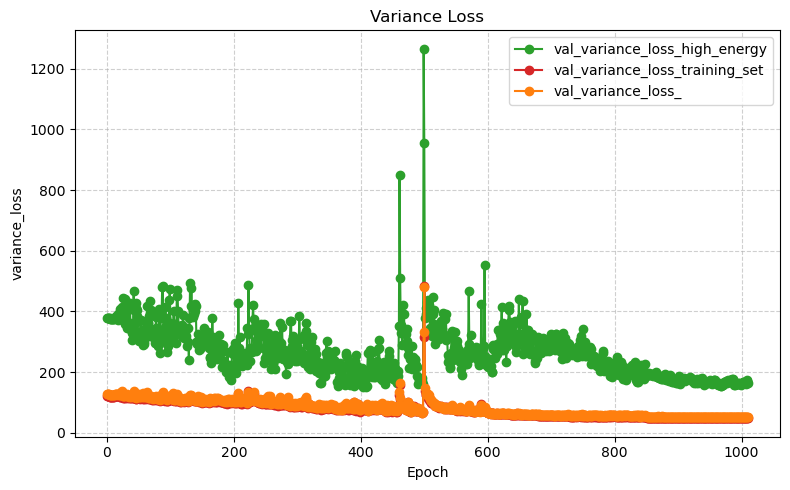

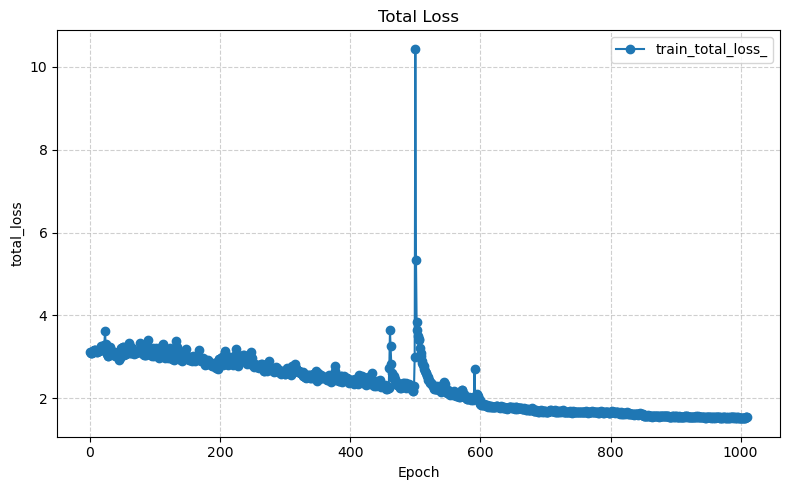

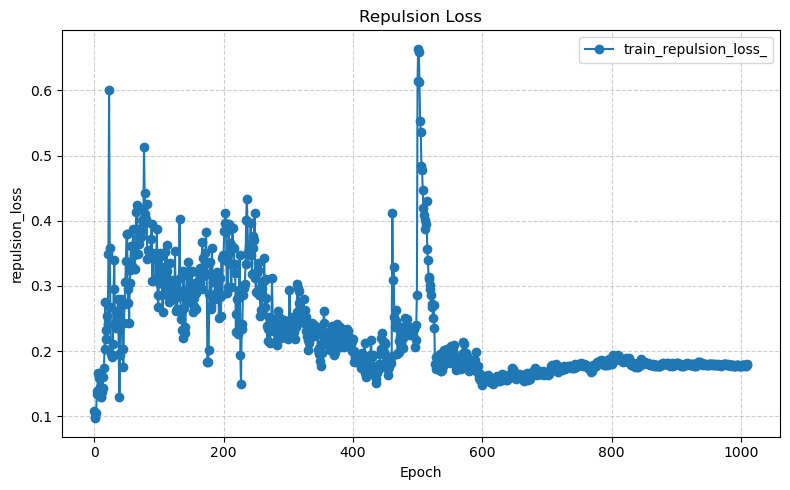

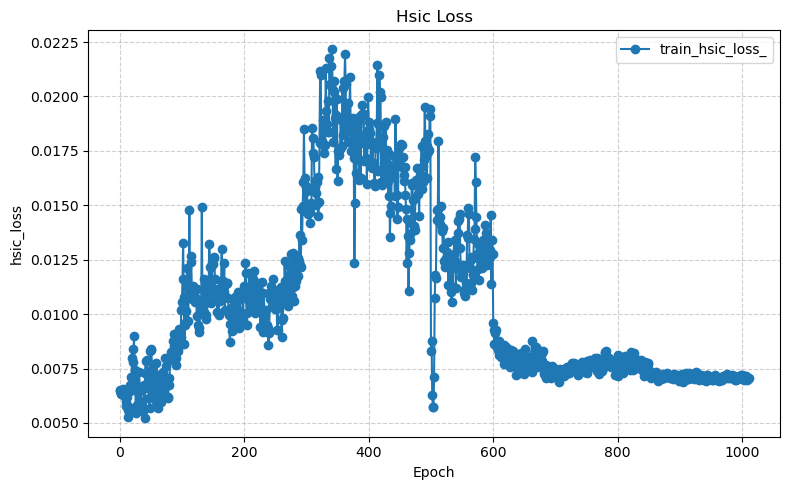

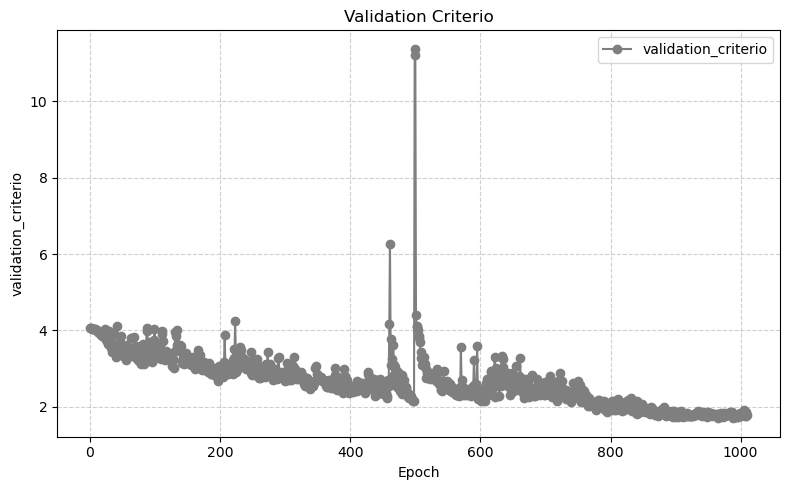

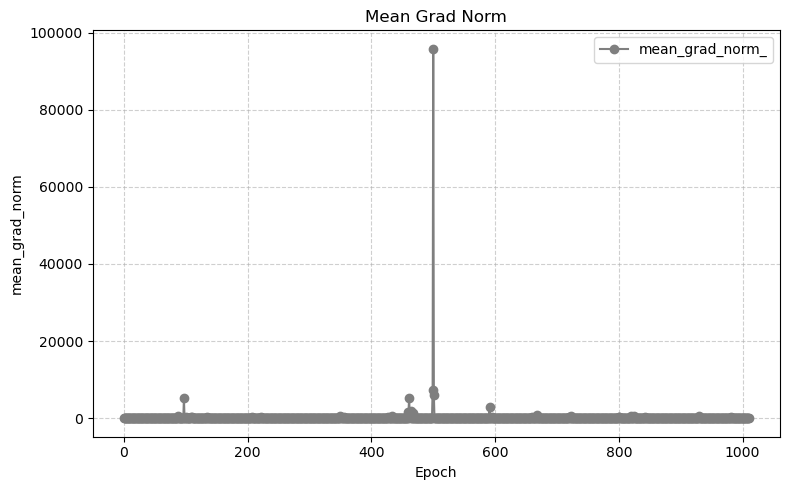

In [8]:
visualize_epoch_metrics(
 save_dir_path,
["val_prediction_loss_", "val_variance_loss_high_energy", "val_prediction_loss_high_energy", "val_variance_loss_training_set", "val_prediction_loss_training_set",  "val_variance_loss_", "train_total_loss_", "train_repulsion_loss_", "train_hsic_loss_" , "validation_criterio", "mean_grad_norm_"],
plot_on_same_graph=True,
verbose=True,
specific_epochs=None
)


📊 Processing directory: val_trajectories_data

For the epoch_1010 in val_trajectories_data the values are:
92: X_mean = 7.1971 ± 4.4907, U_mean = -13.3071 ± 5.9120 and A=13.564677634903196, phi=-2.7802771843251053
64: X_mean = 5.3452 ± 3.8776, U_mean = -11.7189 ± 4.7852 and A=11.313750136394223, phi=-2.8600808883112765
6: X_mean = 3.8831 ± 4.2286, U_mean = -4.4322 ± 2.1540 and A=3.4643759649388923, phi=0.5272390069263062

📊 Processing directory: val_train_set_trajectories_data

For the epoch_1010 in val_train_set_trajectories_data the values are:
2: X_mean = -2.0481 ± 2.6819, U_mean = -7.7249 ± 1.0172 and A=2.0004916751010886, phi=-1.322539930867642
120: X_mean = -2.0419 ± 7.1981, U_mean = 0.1906 ± 6.1657 and A=15.491933918298438, phi=-0.3577443145058989
96: X_mean = 1.7558 ± 5.2349, U_mean = 0.4176 ± 5.5807 and A=13.856421371448707, phi=0.050548714589954684

📊 Processing directory: val_high_energy_trajectories_data

For the epoch_1010 in val_high_energy_trajectories_data the values a

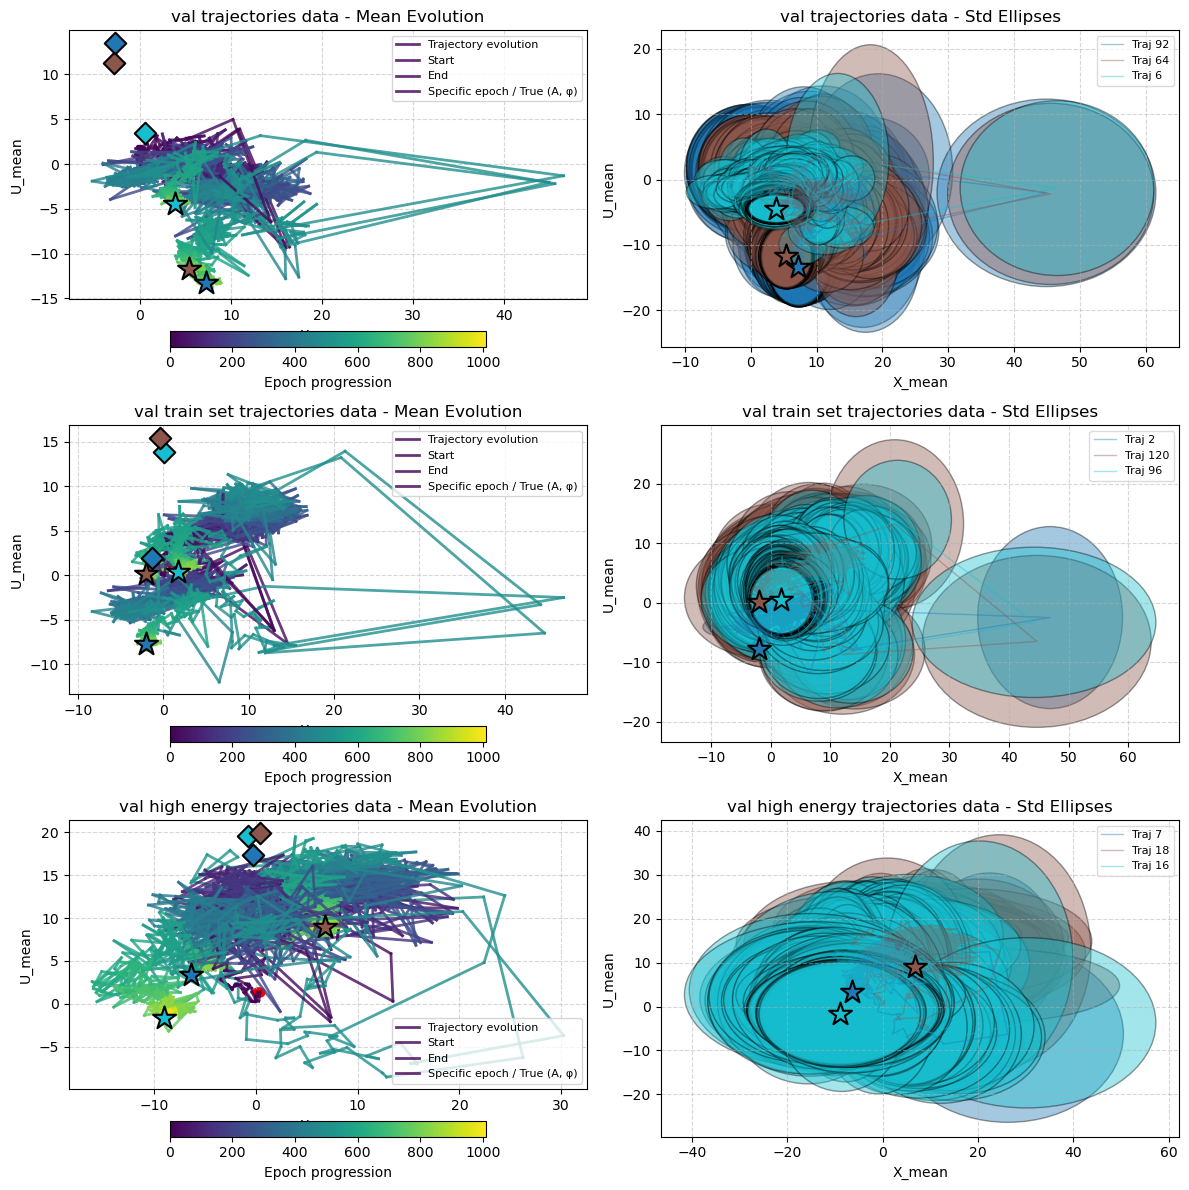


✅ Mean + Std (ellipse) visualization complete.


In [9]:
visualize_trajectory_movements_with_std_ellipses(save_dir_path, number_of_points_to_plot=3, right_plot_alpha=0.4, verbose=True, specific_epoch = "last", visualize_true_constants=True,train_id_df_added=train_id_df_added,val_id_df_added=val_id_df_added,val_id_df_high_energy_added=val_id_df_high_energy_revised_added)

In [10]:
val_differencies_df, val_train_differencies_set_df, val_high_energy_differencies_df = analyze_means_with_constants(
    save_dir_path=save_dir_path,
    specific_epoch="last",
    train_id_df_added=train_id_df_added,
    val_id_df_added=val_id_df_added,
    val_id_df_high_energy_added=val_id_df_high_energy_revised_added
)

📂 Using data from epoch: epoch_1010
✅ Data extraction complete.


In [11]:
hsic_loss_statistics_only(
    x=torch.Tensor(val_train_differencies_set_df['A']),
    y=torch.Tensor(val_train_differencies_set_df['phi']),
    sigma_x = -1,
    sigma_y = -1,
    use_unbiased = True,
    epsilon = 1e-10)

tensor(0.)

In [12]:
hsic_loss_statistics_only(
    x=torch.Tensor(val_train_differencies_set_df['X_mean']),
    y=torch.Tensor(val_train_differencies_set_df['U_mean']),
    sigma_x = -1,
    sigma_y = -1,
    use_unbiased = True,
    epsilon = 1e-10)

tensor(0.0041)

0.0657

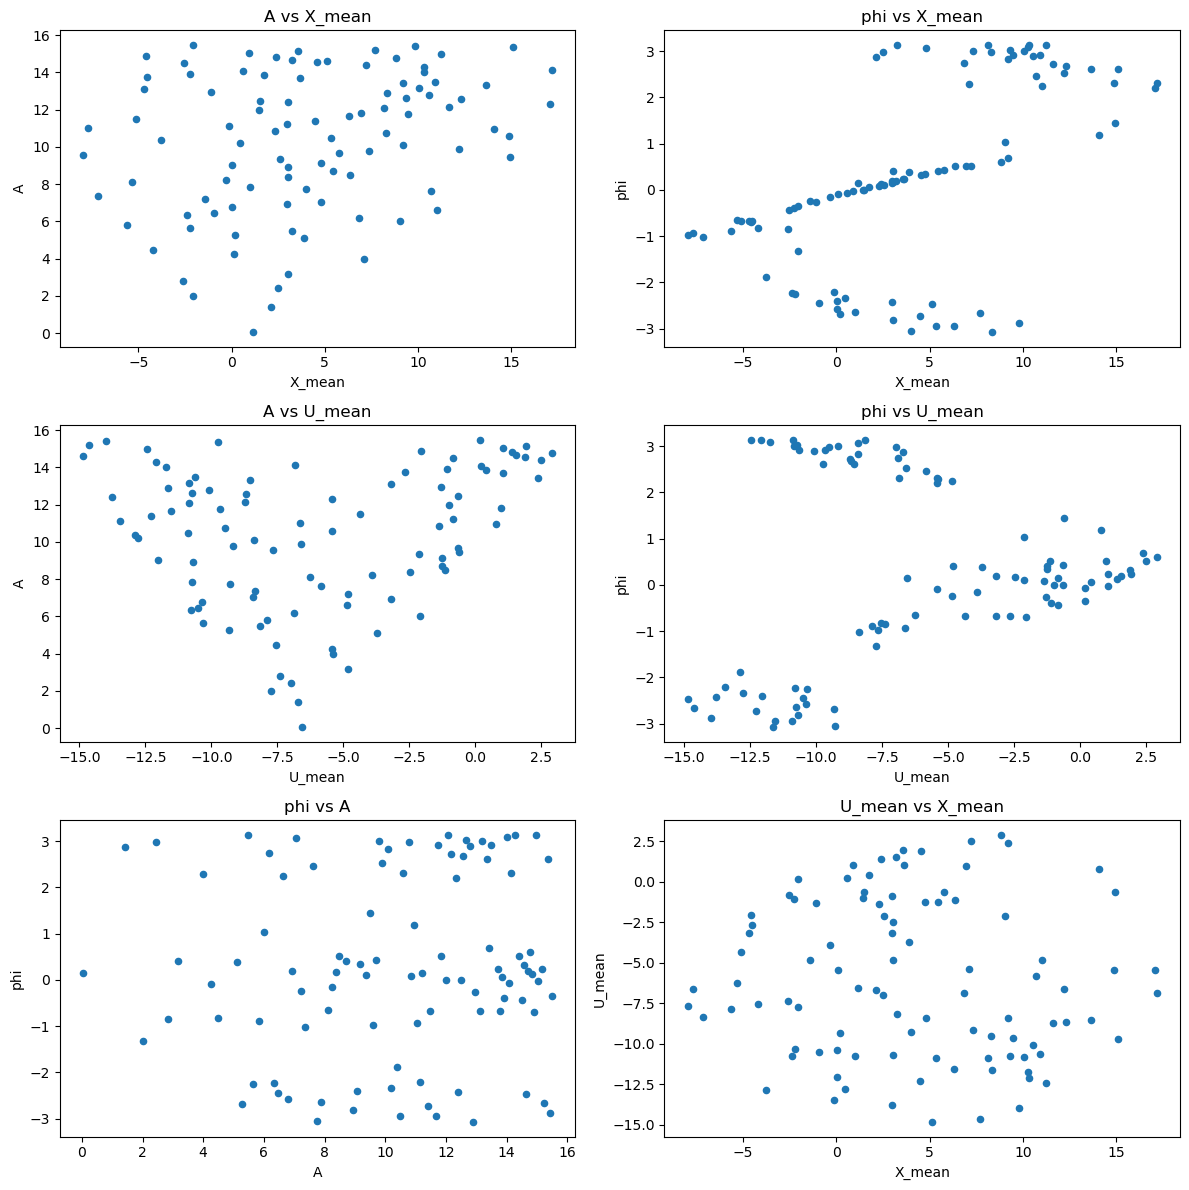

In [13]:
plot_differencies(val_train_differencies_set_df)

📊 Analyzing 1011 epochs across 3 directories...

📁 Processing directory: val_trajectories_data

📁 Processing directory: val_train_set_trajectories_data

📁 Processing directory: val_high_energy_trajectories_data


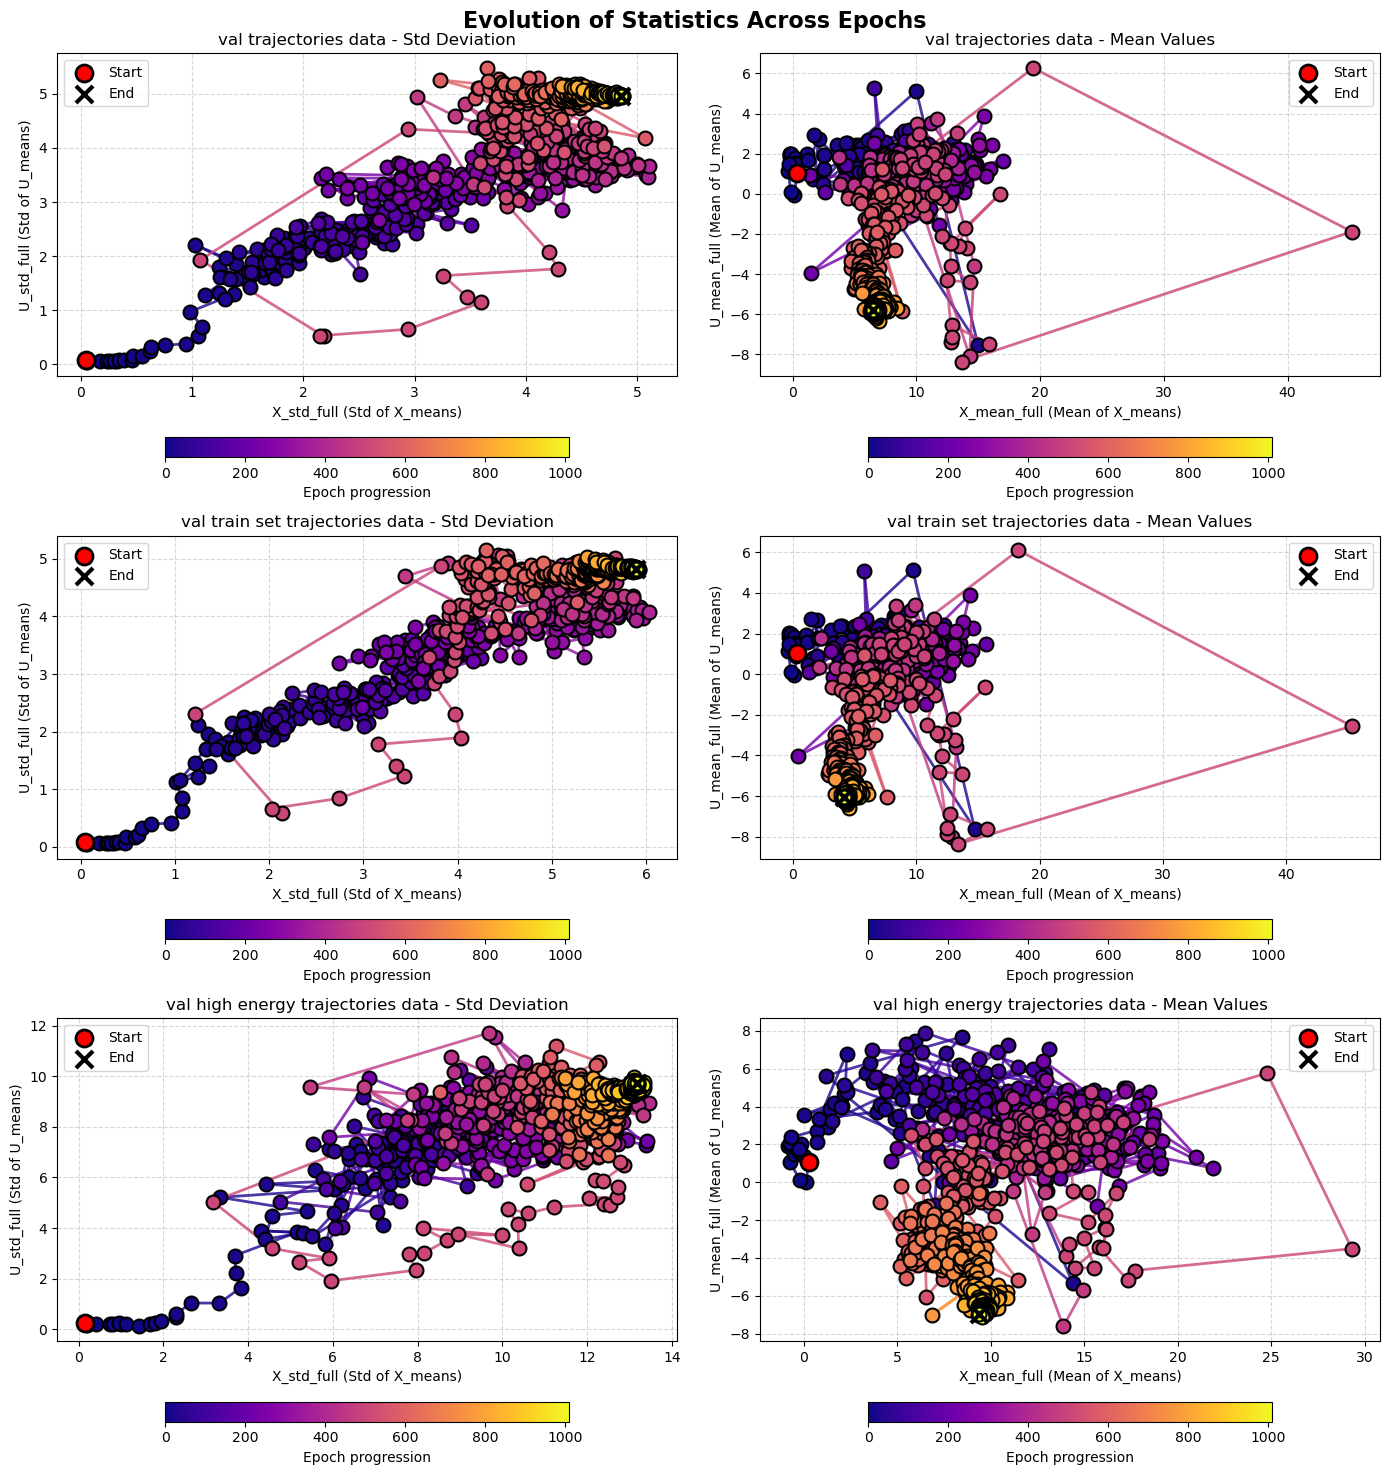

In [14]:
analyze_folders_means(save_dir_path, locate_epoch=None)

In [15]:
device = "cuda"
mapping_net = SimpleStackedHamiltonianNetwork(
        #Hpw many Step_1 + Step_2 layers to stack
    n_layers=10,
        # MLP Architecture parameters
    hidden_dims= [10, 20, 10],
    n_hidden_layers = None,   #Leave None if you provide list on hidden_dims
        
        # Activation parameters
    activation = 'gelu',
    activation_params = None,
    final_activation = None,   #Final layer activation function
    final_activation_only_on_final_layer = True,
    tanh_wrapper = False,
        
        # Initialization parameters
    weight_init = 'orthogonal',
    weight_init_params = {'gain': 1},
    bias_init = 'zeros',
    bias_init_value = 0.0,
        
        
        # Architectural choices
    use_bias = True,
    use_layer_norm = False,
    
    # Input/Output parameters
    input_dim = 2,  # x or u and t
    output_dim = 1,  # scalar G or F
    a_eps_min= 0.5,  # Minimum value for a
    a_eps_max= 2,  # Maximum value for a  
    a_k= 0.1,

    step_1_a_mean_innit= 1.2,
    step_2_a_mean_innit= 1.2,
    std_to_mean_ratio_a_mean_init= 0.0,

    step_1_gamma_mean_innit= 0.5,
    step_2_gamma_mean_innit= 0.5,
    std_to_mean_ratio_gamma_mean_init= 0.0,

    step_1_c1_mean_innit= 0.0,
    step_2_c1_mean_innit= 0.0,
    std_to_mean_ratio_c1_mean_init= 1.0,

    step_1_c2_mean_innit= 0.0,
    step_2_c2_mean_innit= 0.0,
    std_to_mean_ratio_c2_mean_init= 1.0,

    bound_innit=0.0,
).to(device)

checkpoint_path = os.path.join(save_dir_path, "best_model.pt")

load_checkpoint(path=checkpoint_path, mapping_net=mapping_net, device=device, optimizer=None, scheduler=None)

inverse_net = InverseStackedHamiltonianNetwork(forward_network=mapping_net)


Successfully loaded model
Created inverse network with 10 reverse layers


/home/thomasdev/Desktop/Hamilton_Jacobi_NN/Hamilton_Jacobi_NN/modules.py:4084: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(path, map_location=devic

In [225]:
test_canonical_tranformation_on_trajectory(get_data_from_trajectory_id_function=get_data_from_trajectory_id, compute_jacobian_functional_function=compute_jacobian_functional, compute_symplectic_product_function=compute_symplectic_product, check_canonical_transformation_function=check_canonical_transformation, tolerance=1e-4, test_id_df=val_id_df, test_df=val_df, trajectory_id=50, mapping_net=mapping_net, inverse_net=inverse_net, device=device)

For the mapping network:
✓ All 242 transformations are canonical (preserve symplectic structure)!
  Maximum error across all samples: 2.10e-05
For the inverse network:
✓ All 242 transformations are canonical (preserve symplectic structure)!
  Maximum error across all samples: 4.77e-06


In [16]:
print(f"Number of parameters are: {count_parameters(mapping_net)}, with number of training samples: {train_df.shape[0]}\nThat is a ratio of parameters/samples of: {count_parameters(mapping_net)/train_df.shape[0]}")

Number of parameters are: 9500, with number of training samples: 23232
That is a ratio of parameters/samples of: 0.4089187327823691


   num_observed_points  mean_loss
0                    1   5.257938
1                    2   4.920263
2                    3   4.751551
3                    4   4.684066
4                    5   4.926793
5                    6   4.810528
6                    7   5.498297
7                    8   5.254750
8                    9   5.087208
9                   10   4.969807


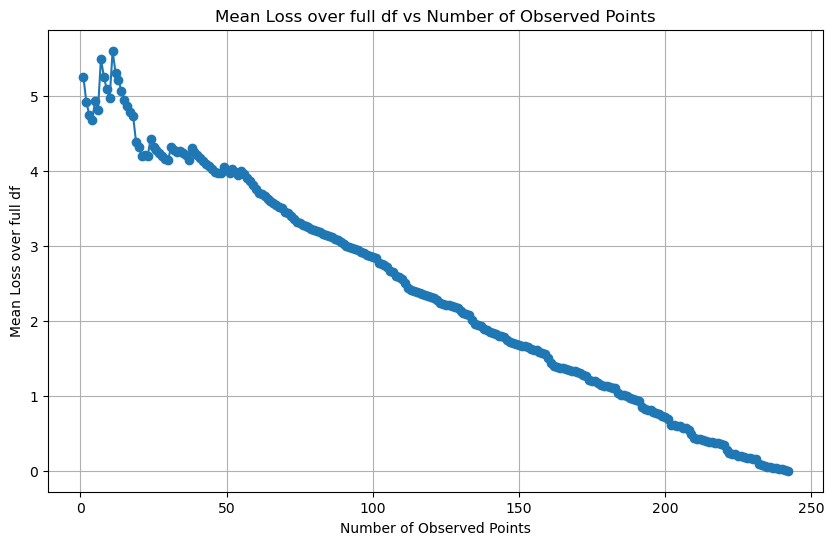

In [227]:
val_loss_per_points_df = test_model_with_varying_observed_points(get_data_from_trajectory_id_function=get_data_from_trajectory_id, prediction_loss_function=prediction_loss_euclidean, test_id_df=val_id_df, test_df=val_df, mapping_net=mapping_net, inverse_net=inverse_net, device=device)

   num_observed_points  mean_variance
0                    1       0.000000
1                    2       1.371074
2                    3       2.846893
3                    4       3.936029
4                    5       3.225626
5                    6      26.202967
6                    7      25.385415
7                    8      22.216640
8                    9      19.912711
9                   10      18.027685


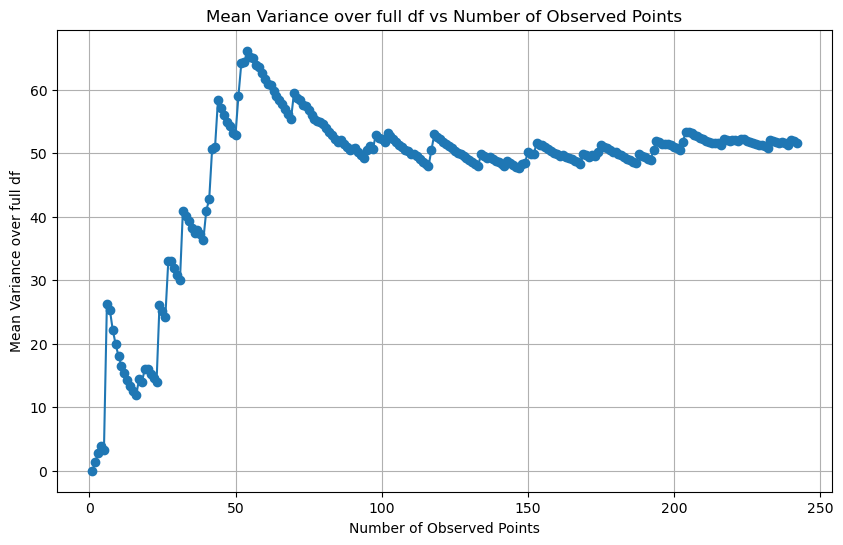

In [228]:
val_variance_per_points_df = test_model_variance_with_varying_observed_points(get_data_from_trajectory_id_function=get_data_from_trajectory_id ,test_id_df=val_id_df, test_df=val_df, mapping_net=mapping_net ,device=device)

In [18]:
point_indexes_observed = [130]

In [19]:
k=1
mass=1
constant = -(k / mass)
omega = np.sqrt(-constant)
period = 2*np.pi/omega

     trajectory_id      energy  prediction_loss  loss_per_sqrt_energy
6                6    6.000950         2.954302              1.205993
11              11   11.000909         2.338742              0.705128
28              28   28.000769         4.601940              0.869673
43              43   43.000645         5.883492              0.897217
50              50   50.000587         4.326733              0.611889
64              64   64.000471         3.966377              0.495795
71              71   71.000413         4.254739              0.504943
85              85   85.000298         5.855301              0.635095
92              92   92.000240         5.398811              0.562864
93              93   93.000231         4.577812              0.474696
103            103  103.000149         5.138553              0.506316
114            114  114.000058         5.570270              0.521703
Mean prediction loss over full dataframe: 4.5723


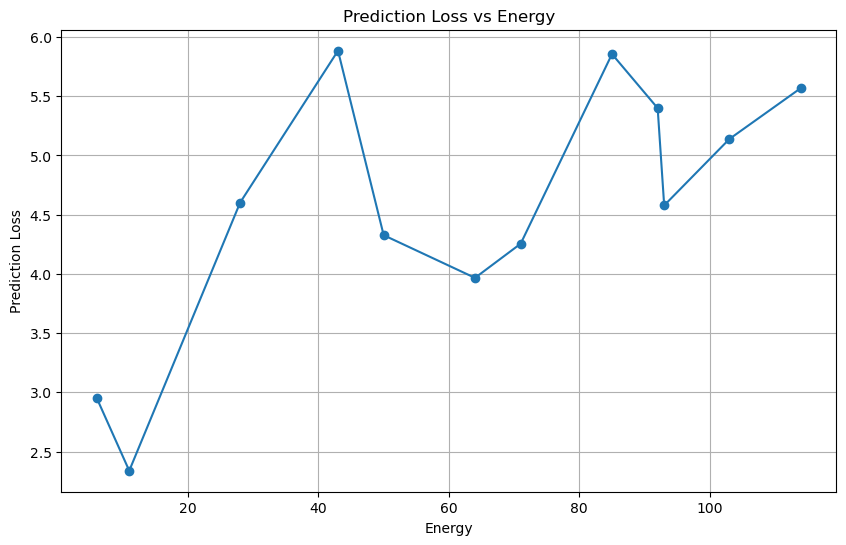

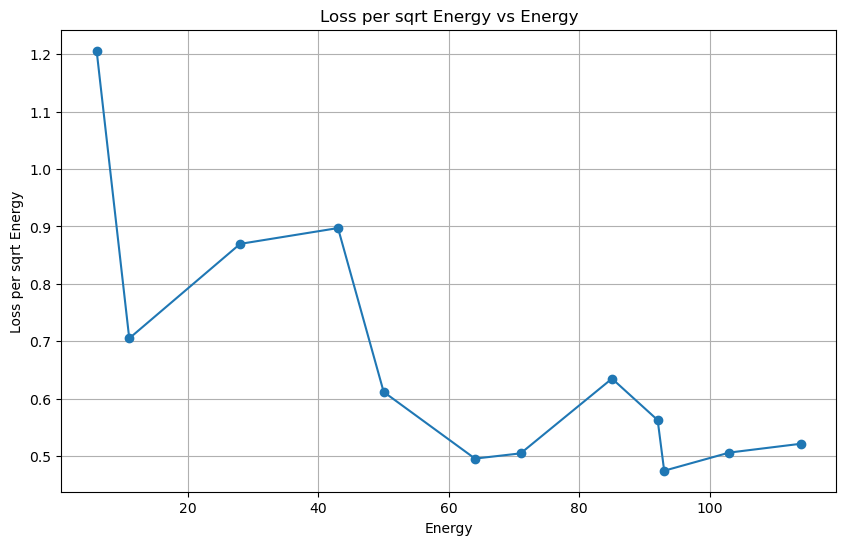

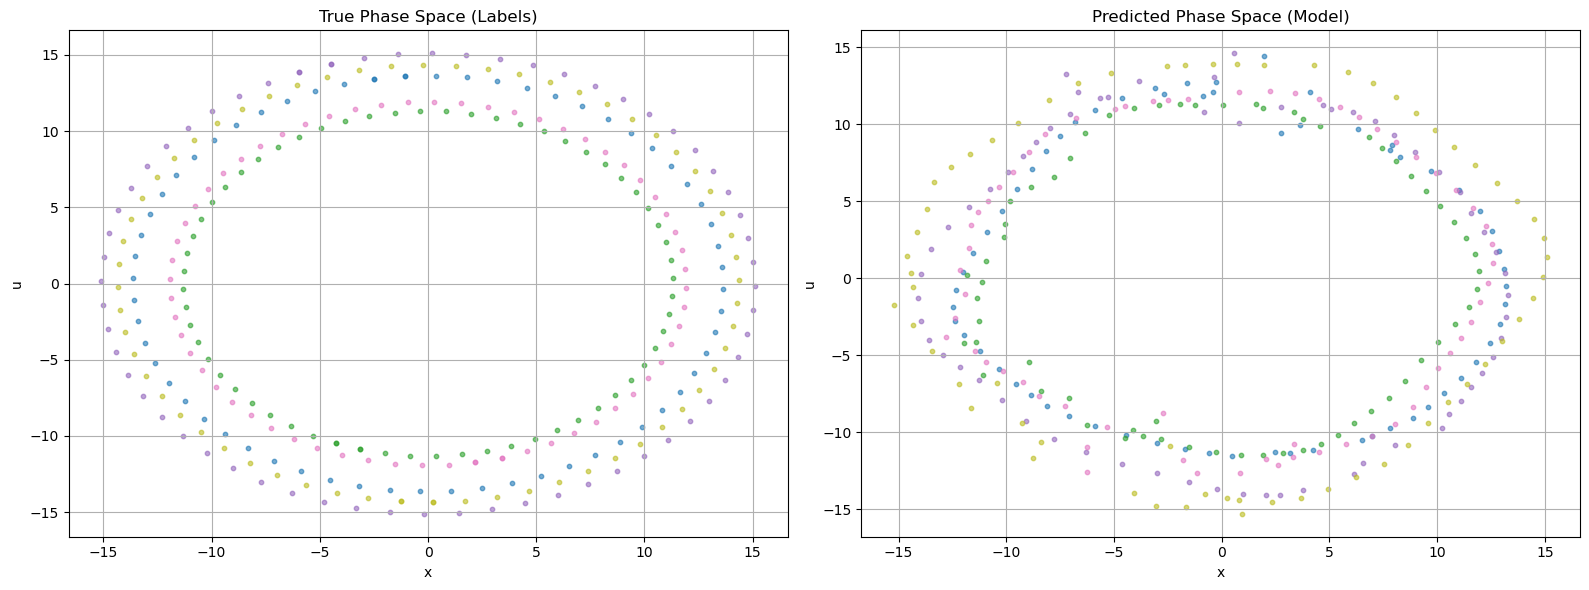

In [28]:
prediction_val_df, mean_prediction_loss_val, _ = test_model_in_all_trajectories_in_df(get_data_from_trajectory_id_function=get_data_from_trajectory_id, prediction_loss_function=prediction_loss_euclidean, test_id_df=val_id_df, test_df=val_df, mapping_net=mapping_net, inverse_net=inverse_net, device=device, point_indexes_observed=point_indexes_observed, recreate_and_plot_phase_space=True, plot_specific_portion=0.26, connect_points=False, plot_trajectories_subsample=0.4)

     trajectory_id      energy  variance_loss  variance_per_sqrt_energy
6                6    6.000950            0.0                       0.0
11              11   11.000909            0.0                       0.0
28              28   28.000769            0.0                       0.0
43              43   43.000645            0.0                       0.0
50              50   50.000587            0.0                       0.0
64              64   64.000471            0.0                       0.0
71              71   71.000413            0.0                       0.0
85              85   85.000298            0.0                       0.0
92              92   92.000240            0.0                       0.0
93              93   93.000231            0.0                       0.0
103            103  103.000149            0.0                       0.0
114            114  114.000058            0.0                       0.0
Mean prediction loss over full dataframe: 0.0000


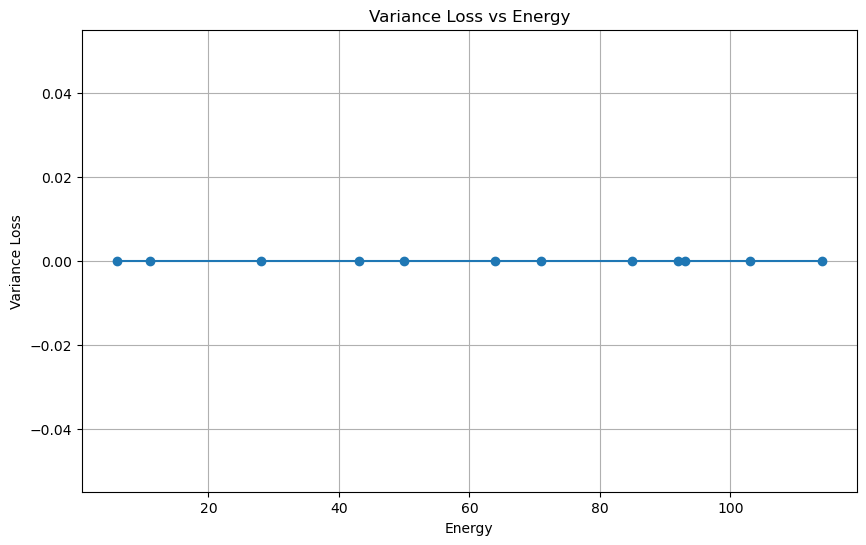

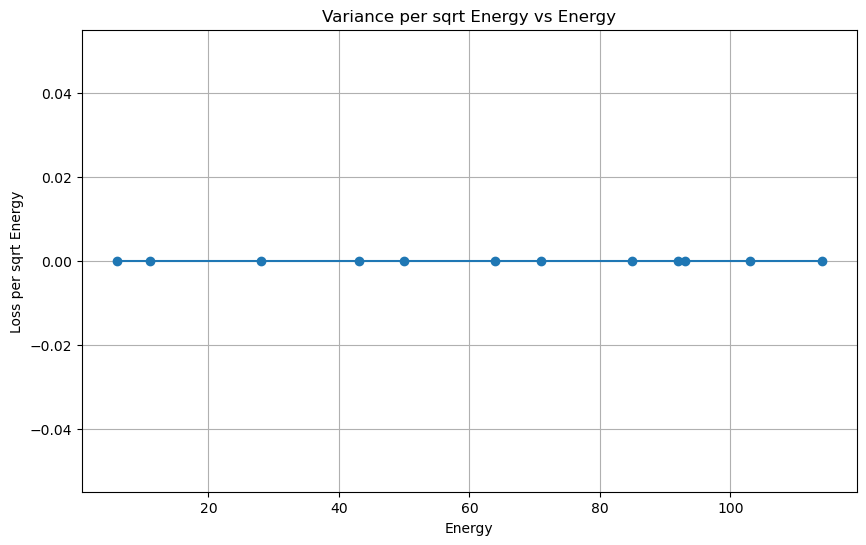

In [22]:
variance_val_df, mean_variance_loss_val = test_model_variance_in_all_trajectories_in_df(get_data_from_trajectory_id_function=get_data_from_trajectory_id, test_id_df=val_id_df, test_df=val_df, mapping_net=mapping_net, device=device, point_indexes_observed=point_indexes_observed)


In [29]:
trajectory_id_val = 93

Observed time points: [13.613568]


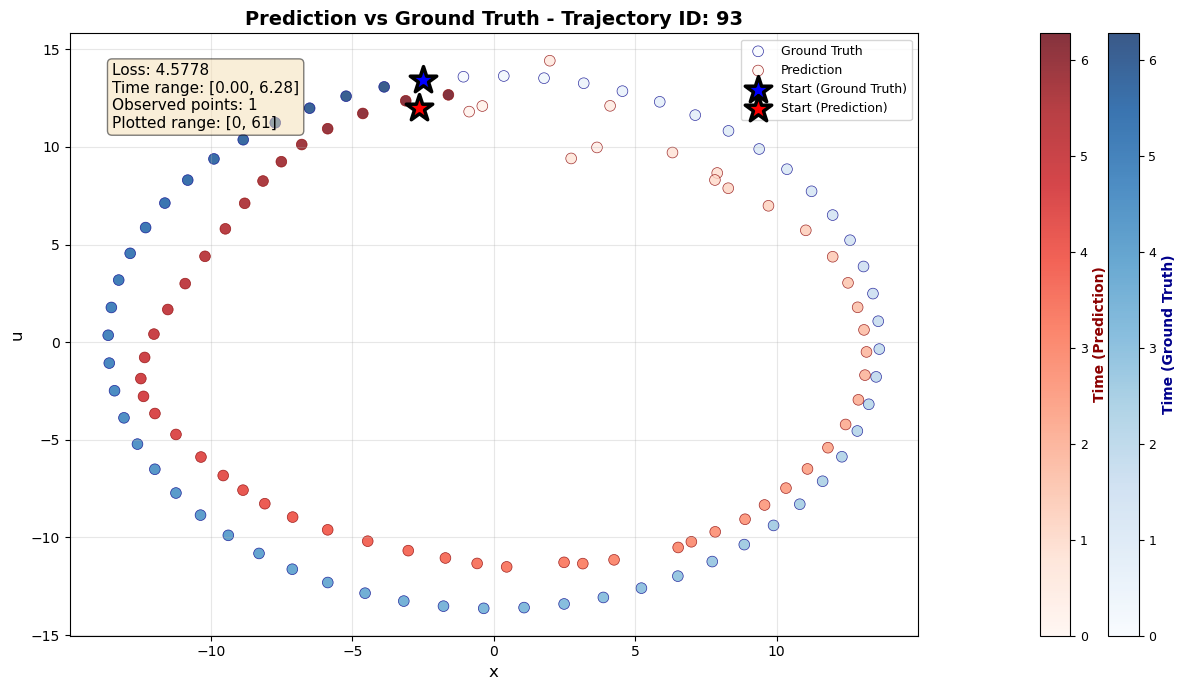

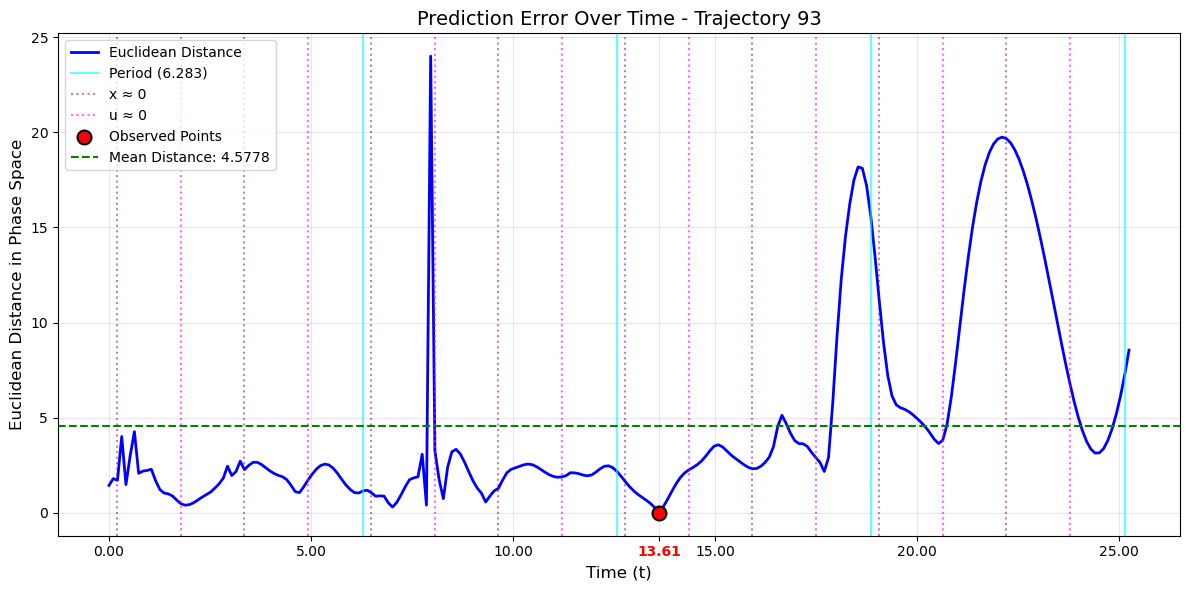

In [30]:
test_model_in_single_trajectory(get_data_from_trajectory_id_function=get_data_from_trajectory_id, prediction_loss_function=prediction_loss_euclidean, test_id_df=val_id_df, test_df=val_df, trajectory_id=trajectory_id_val, mapping_net=mapping_net, inverse_net=inverse_net, device=device, point_indexes_observed=point_indexes_observed, connect_points=False, portion_to_visualize=[0,61], show_zeroings=True, show_period=True, period=period)

     trajectory_id      energy  prediction_loss  loss_per_sqrt_energy
7                7    7.000942         2.245715              0.848744
12              12   12.000901         3.457343              0.998011
32              32   32.000736         4.028943              0.712215
37              37   37.000694         3.811707              0.626635
39              39   39.000678         4.220943              0.675886
53              53   53.000562         3.917998              0.538176
57              57   57.000529         6.954216              0.921104
67              67   67.000446         7.975618              0.974374
75              75   75.000380         5.181486              0.598305
81              81   81.000331         5.568357              0.618705
88              88   88.000273         4.272384              0.455437
101            101  101.000165         5.430756              0.540380
117            117  117.000033         5.514972              0.509859
Mean prediction loss

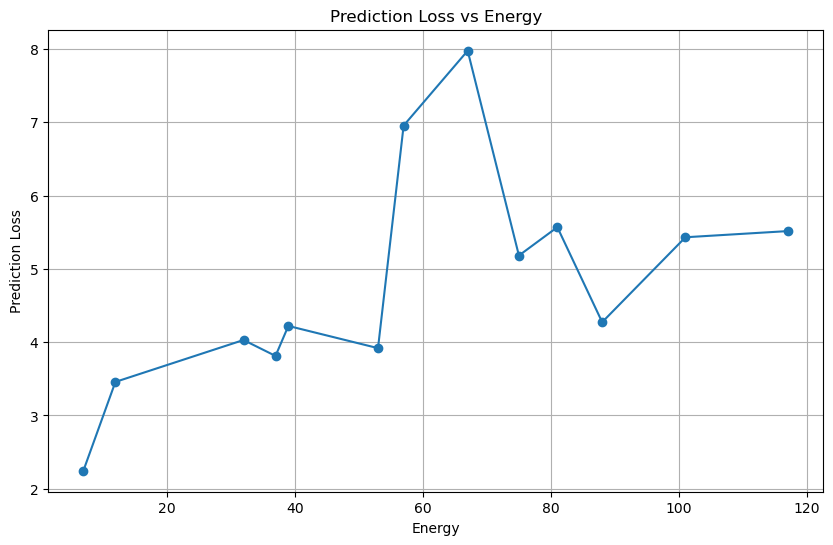

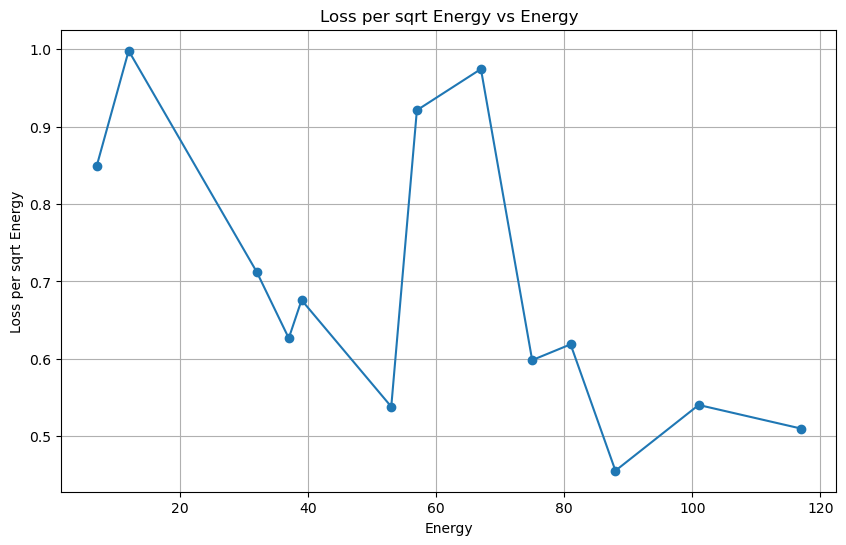

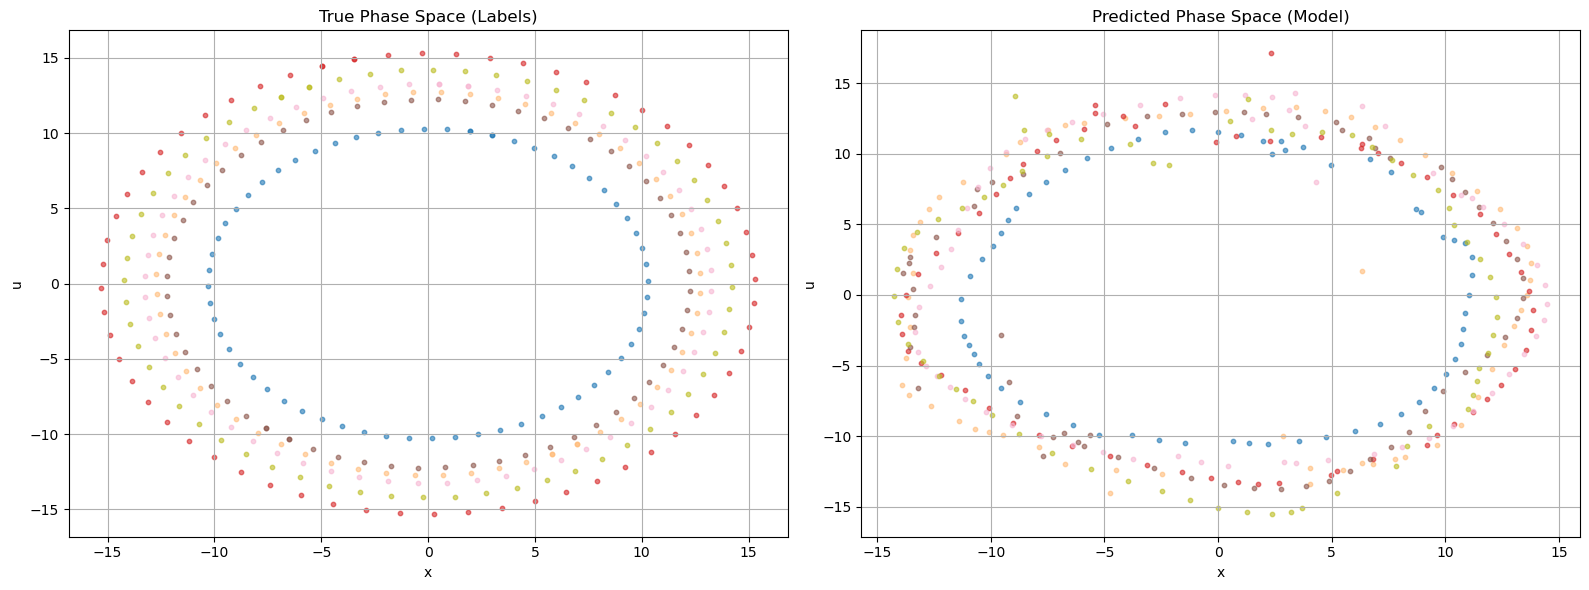

In [27]:
prediction_test_df, mean_prediction_loss_test, pred_test_df = test_model_in_all_trajectories_in_df(get_data_from_trajectory_id_function=get_data_from_trajectory_id, prediction_loss_function=prediction_loss_euclidean, test_id_df=test_id_df, test_df=test_df, mapping_net=mapping_net, inverse_net=inverse_net, device=device, point_indexes_observed=point_indexes_observed, recreate_and_plot_phase_space=True, plot_specific_portion=0.26, connect_points=False, plot_trajectories_subsample=0.4)

     trajectory_id      energy  variance_loss  variance_per_sqrt_energy
7                7    7.000942            0.0                       0.0
12              12   12.000901            0.0                       0.0
32              32   32.000736            0.0                       0.0
37              37   37.000694            0.0                       0.0
39              39   39.000678            0.0                       0.0
53              53   53.000562            0.0                       0.0
57              57   57.000529            0.0                       0.0
67              67   67.000446            0.0                       0.0
75              75   75.000380            0.0                       0.0
81              81   81.000331            0.0                       0.0
88              88   88.000273            0.0                       0.0
101            101  101.000165            0.0                       0.0
117            117  117.000033            0.0                   

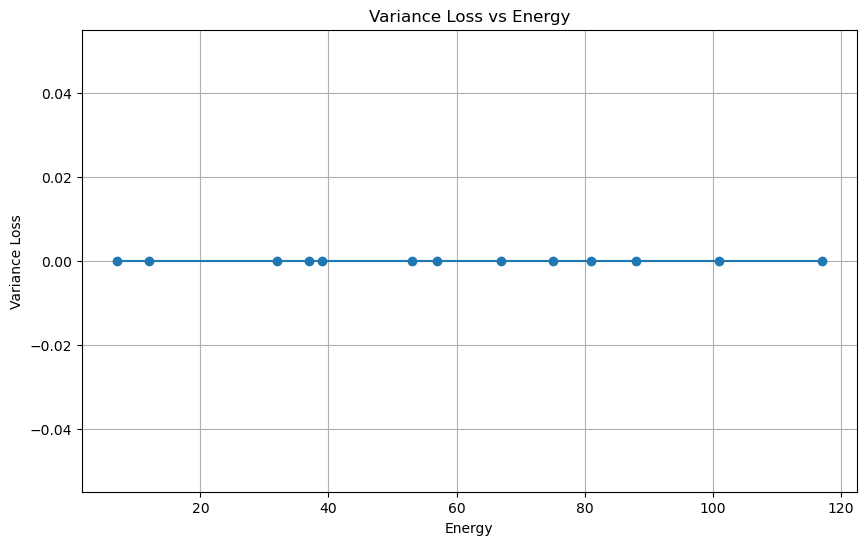

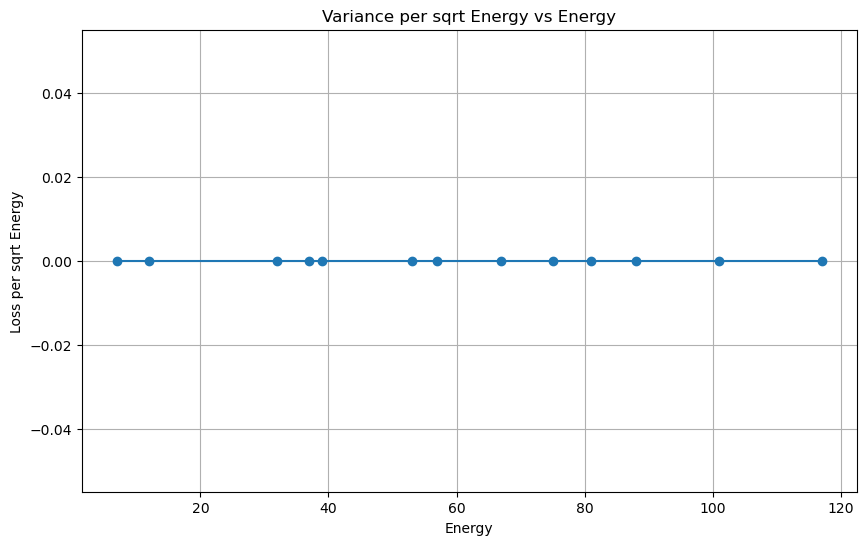

In [45]:
variance_test_df, mean_variance_loss_test = test_model_variance_in_all_trajectories_in_df(get_data_from_trajectory_id_function=get_data_from_trajectory_id, test_id_df=test_id_df, test_df=test_df, mapping_net=mapping_net, device=device, point_indexes_observed=point_indexes_observed)


In [31]:
trajectory_id_test = 88

Observed time points: [13.613568]


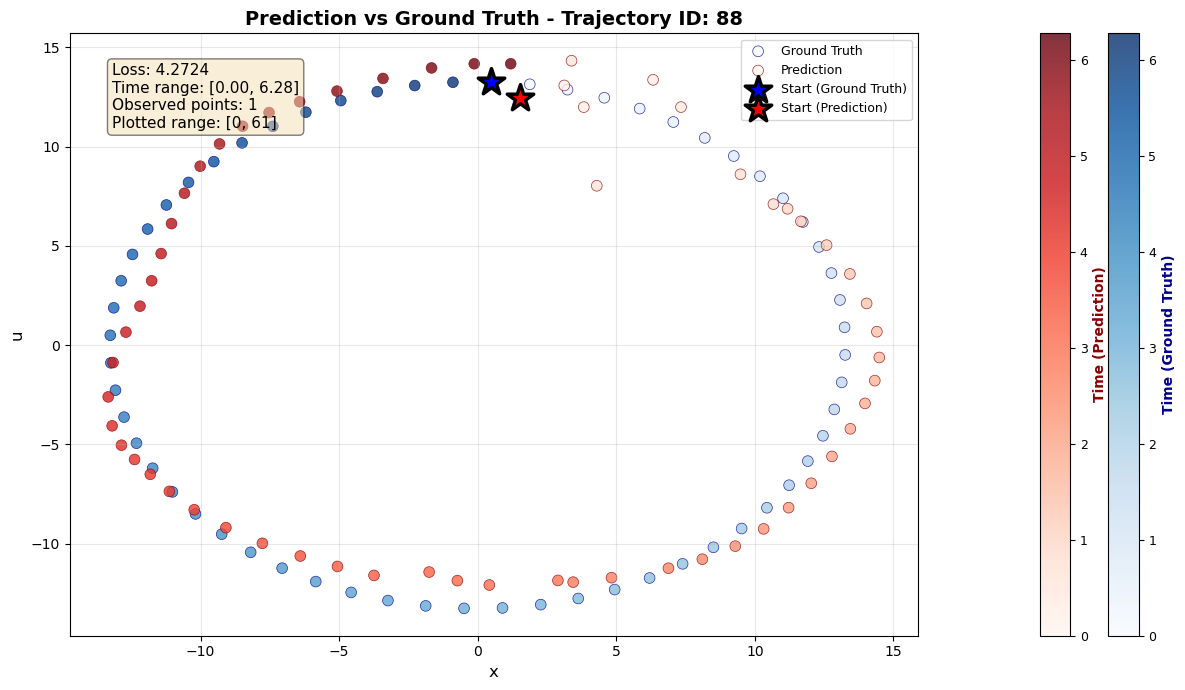

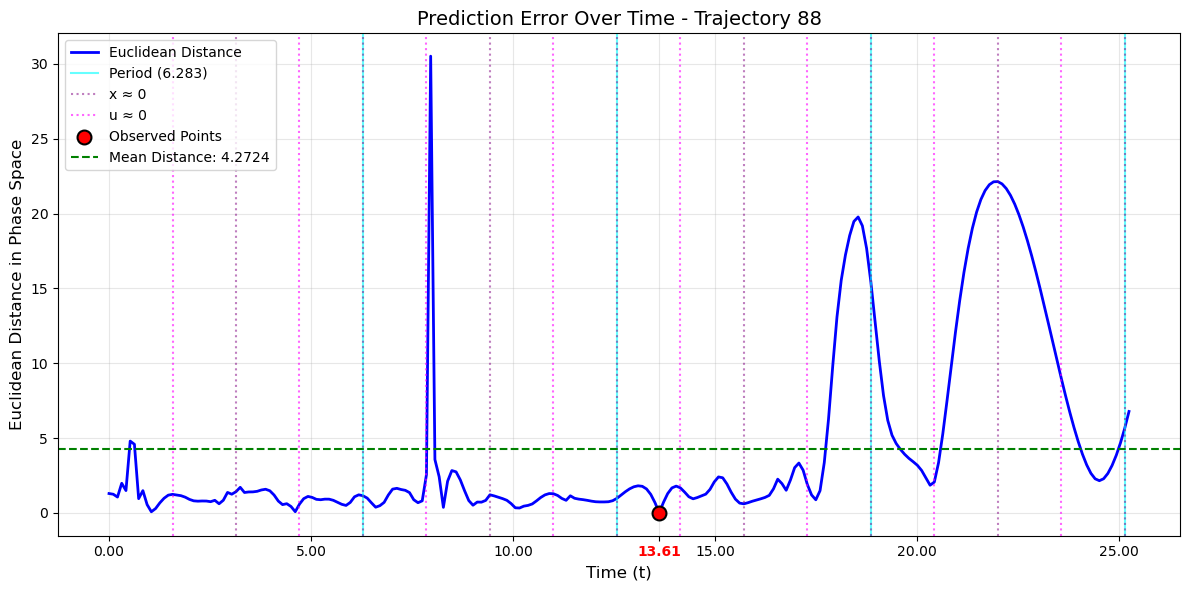

In [33]:
test_model_in_single_trajectory(get_data_from_trajectory_id_function=get_data_from_trajectory_id, prediction_loss_function=prediction_loss_euclidean, test_id_df=test_id_df, test_df=test_df, trajectory_id=trajectory_id_test, mapping_net=mapping_net, inverse_net=inverse_net, device=device, point_indexes_observed=point_indexes_observed, connect_points=False, portion_to_visualize=[0,61], show_zeroings=True, show_period=True, period=period)

In [34]:
print(f"The max energy of a trajectory in the training set is: {train_id_df['energy'].max():.3f}\nThe high energy testing set has energies in the range: {test_id_df_high_energy_revised['energy'].min():.3f}-{test_id_df_high_energy_revised['energy'].max():.3f}")

The max energy of a trajectory in the training set is: 120.000
The high energy testing set has energies in the range: 129.710-247.290


In [37]:
point_indexes_observed_high_energy = [10]

    trajectory_id      energy  prediction_loss  loss_per_sqrt_energy
2               2  129.709677         2.104835              0.184813
4               4  138.419355         3.218277              0.273543
5               5  142.774194         4.577845              0.383121
6               6  147.129032         3.109476              0.256353
9               9  160.193548        10.968873              0.866642
10             10  164.548387        10.202712              0.795369
12             12  173.258065         4.011796              0.304784
14             14  181.967742         7.291687              0.540544
15             15  186.322581         6.529082              0.478321
17             17  195.032258         6.157904              0.440940
19             19  203.741935         9.381416              0.657246
20             20  208.096774        11.105250              0.769832
22             22  216.806452         5.798380              0.393795
26             26  234.225806     

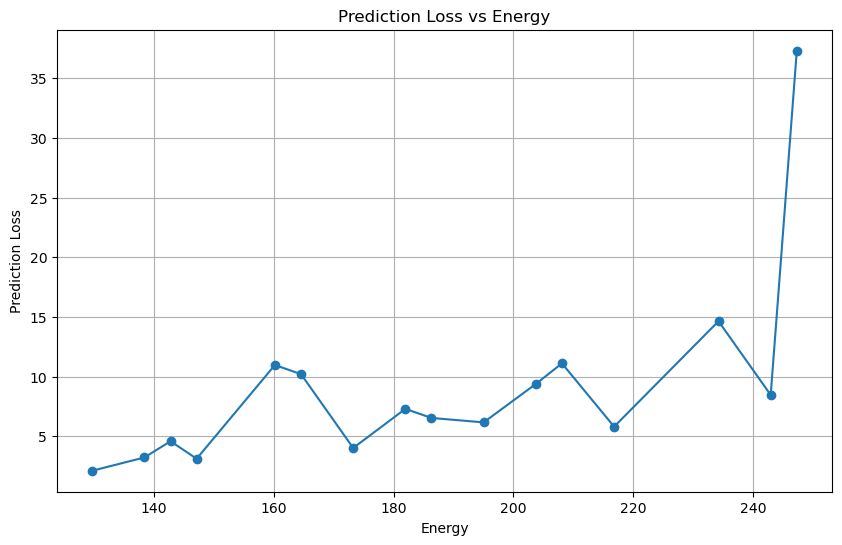

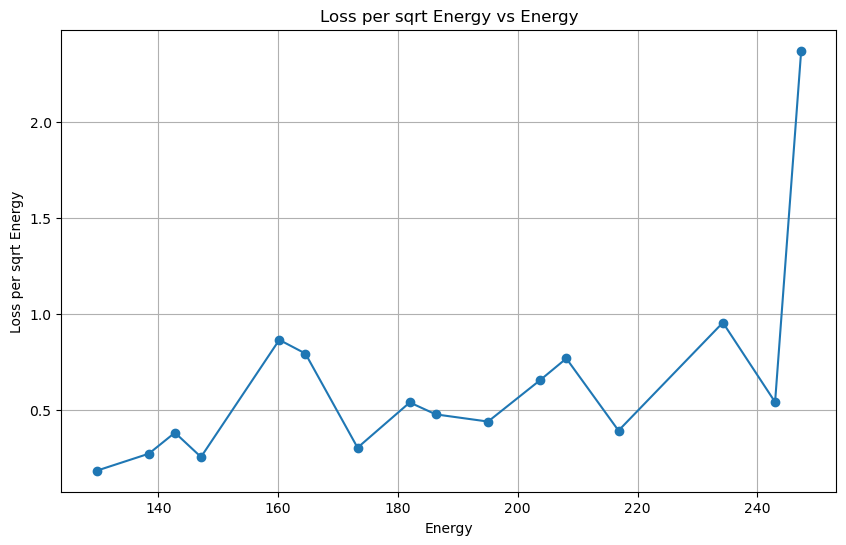

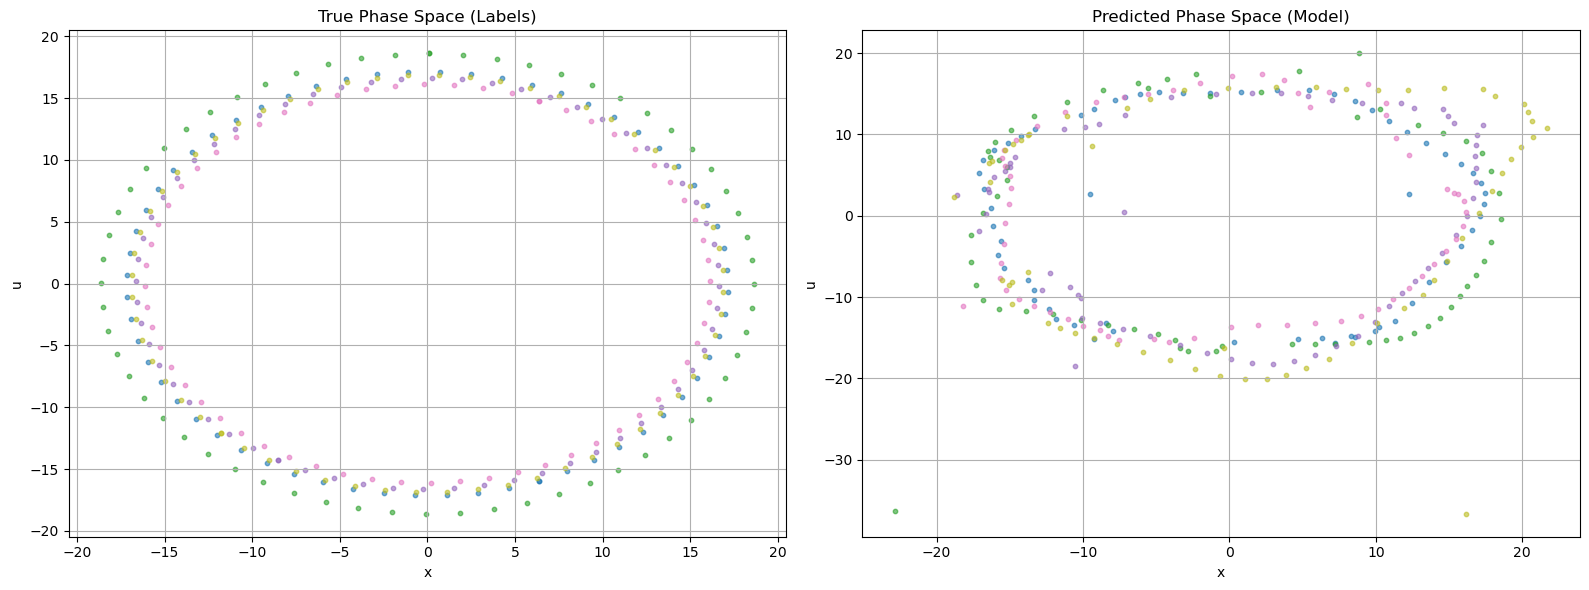

In [38]:
prediction_test_high_energy_df, mean_prediction_loss_test_high_energy, pred_test_high_energy_df = test_model_in_all_trajectories_in_df(get_data_from_trajectory_id_function=get_data_from_trajectory_id, prediction_loss_function=prediction_loss_euclidean, test_id_df=test_id_df_high_energy_revised, test_df=test_df_high_energy_revised, mapping_net=mapping_net, inverse_net=inverse_net, device=device, point_indexes_observed=point_indexes_observed_high_energy, recreate_and_plot_phase_space=True, plot_specific_portion=1.0, connect_points=False, plot_trajectories_subsample=0.3)

    trajectory_id      energy  variance_loss  variance_per_sqrt_energy
2               2  129.709677            0.0                       0.0
4               4  138.419355            0.0                       0.0
5               5  142.774194            0.0                       0.0
6               6  147.129032            0.0                       0.0
9               9  160.193548            0.0                       0.0
10             10  164.548387            0.0                       0.0
12             12  173.258065            0.0                       0.0
14             14  181.967742            0.0                       0.0
15             15  186.322581            0.0                       0.0
17             17  195.032258            0.0                       0.0
19             19  203.741935            0.0                       0.0
20             20  208.096774            0.0                       0.0
22             22  216.806452            0.0                       0.0
26    

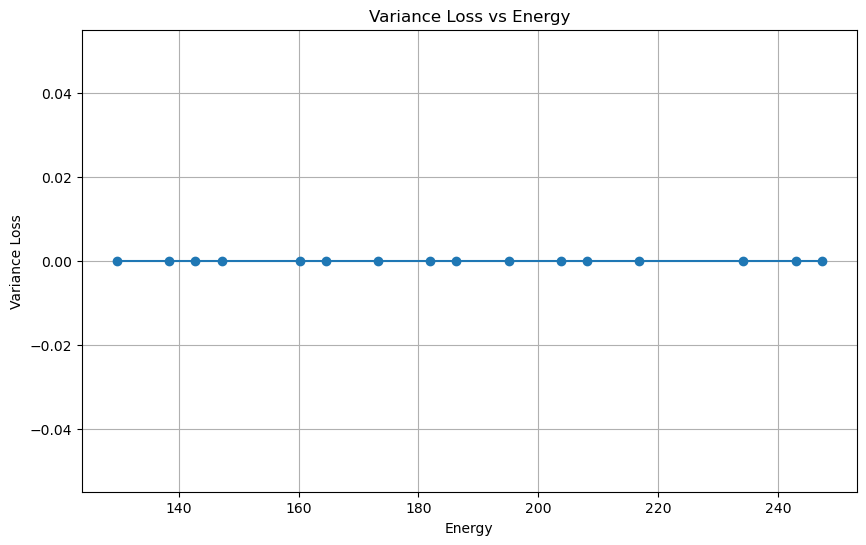

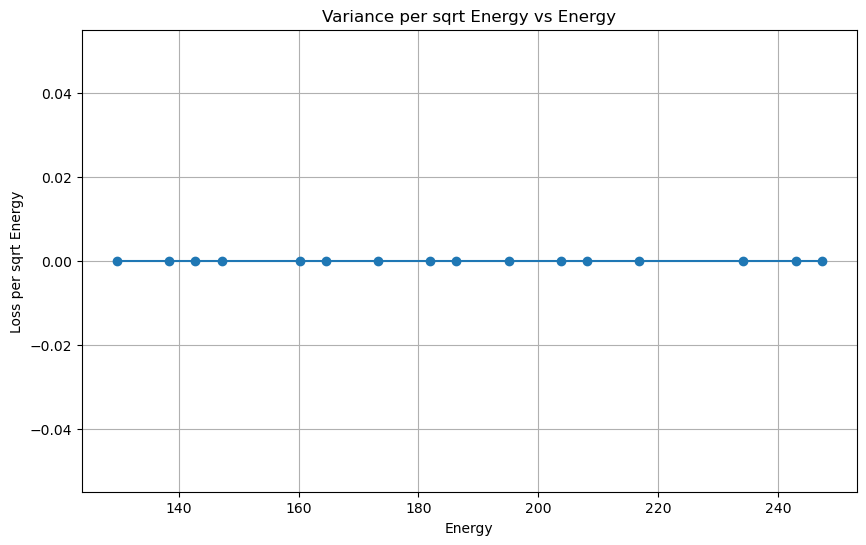

In [39]:
variance_test_high_energy_df, mean_variance_loss_test_high_energy = test_model_variance_in_all_trajectories_in_df(get_data_from_trajectory_id_function=get_data_from_trajectory_id, test_id_df=test_id_df_high_energy_revised, test_df=test_df_high_energy_revised, mapping_net=mapping_net, device=device, point_indexes_observed=point_indexes_observed_high_energy)


In [40]:
trajectory_id_high_energy = 22

Observed time points: [1.0471976]


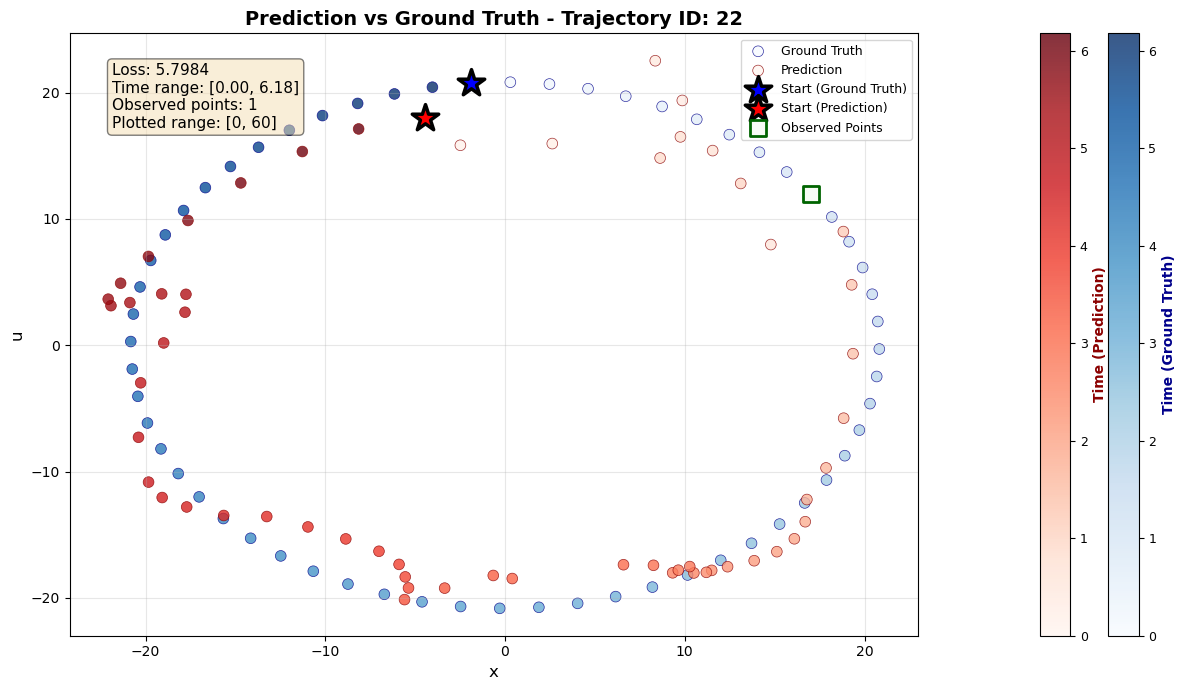

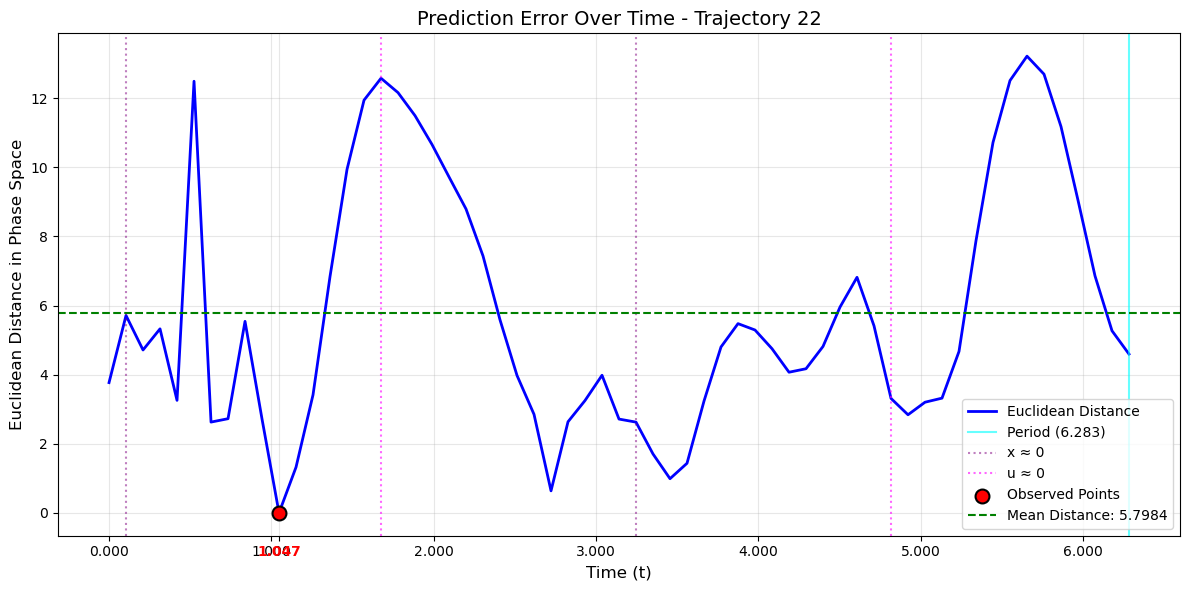

In [41]:
test_model_in_single_trajectory(get_data_from_trajectory_id_function=get_data_from_trajectory_id, prediction_loss_function=prediction_loss_euclidean, test_id_df=test_id_df_high_energy_revised, test_df=test_df_high_energy_revised, trajectory_id=trajectory_id_high_energy, mapping_net=mapping_net, inverse_net=inverse_net, device=device, point_indexes_observed=point_indexes_observed_high_energy, connect_points=False, portion_to_visualize=[0,60], show_zeroings=True, show_period=True, period=period)

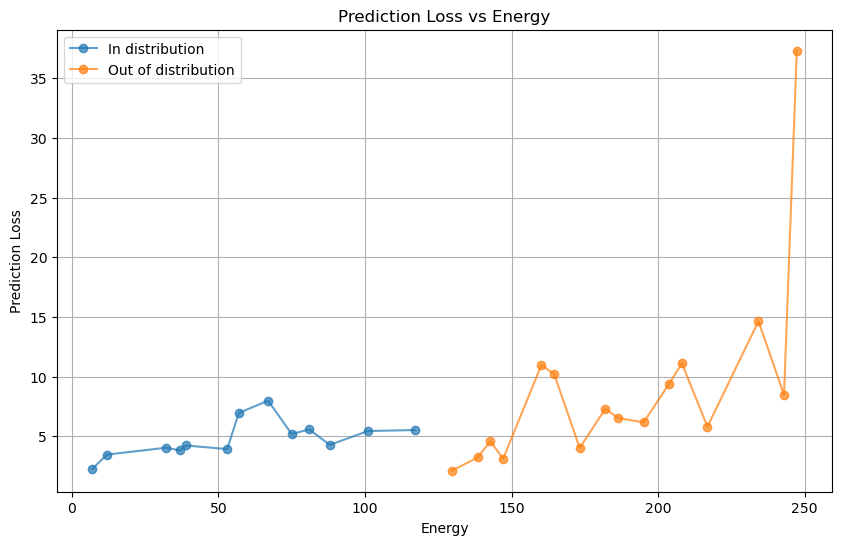

In [42]:
plot_prediction_losses([prediction_test_df, prediction_test_high_energy_df])

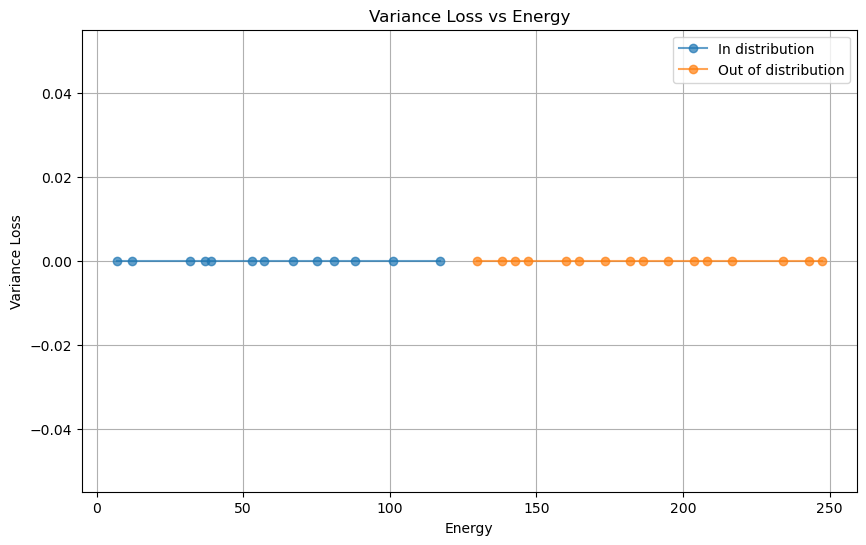

In [46]:
plot_variance_losses([variance_test_df, variance_test_high_energy_df])

Step 1 gamma values mean: 1.814±2.750

Step 2 gamma values mean: 2.105±2.327



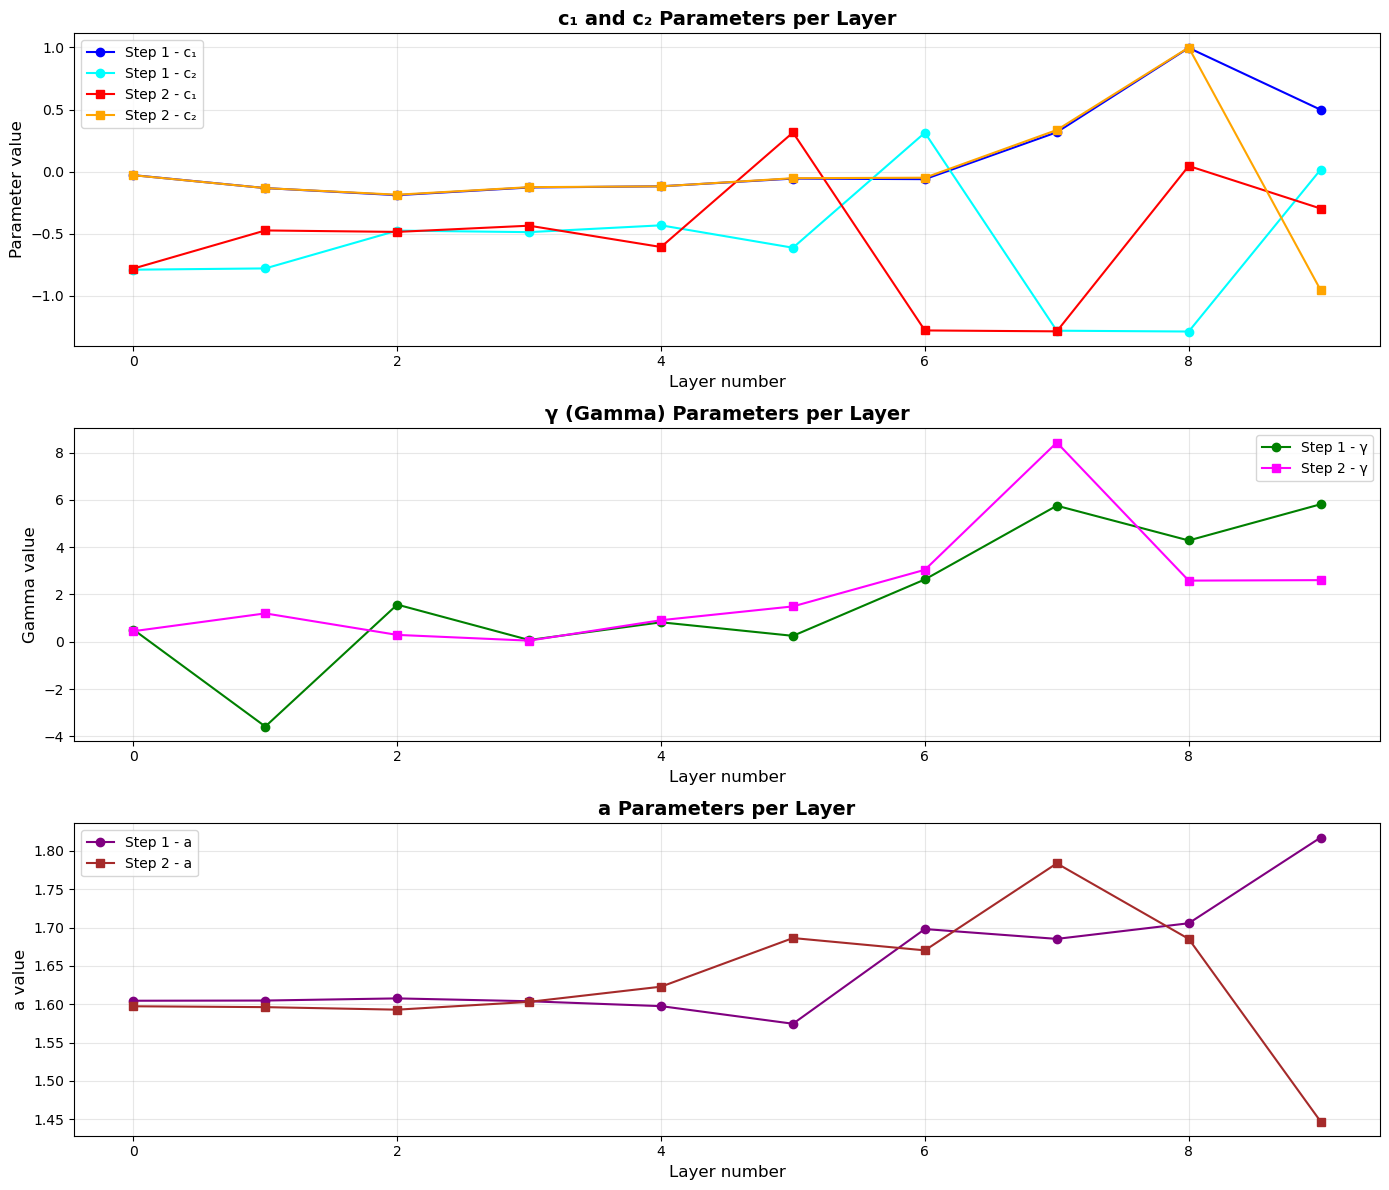

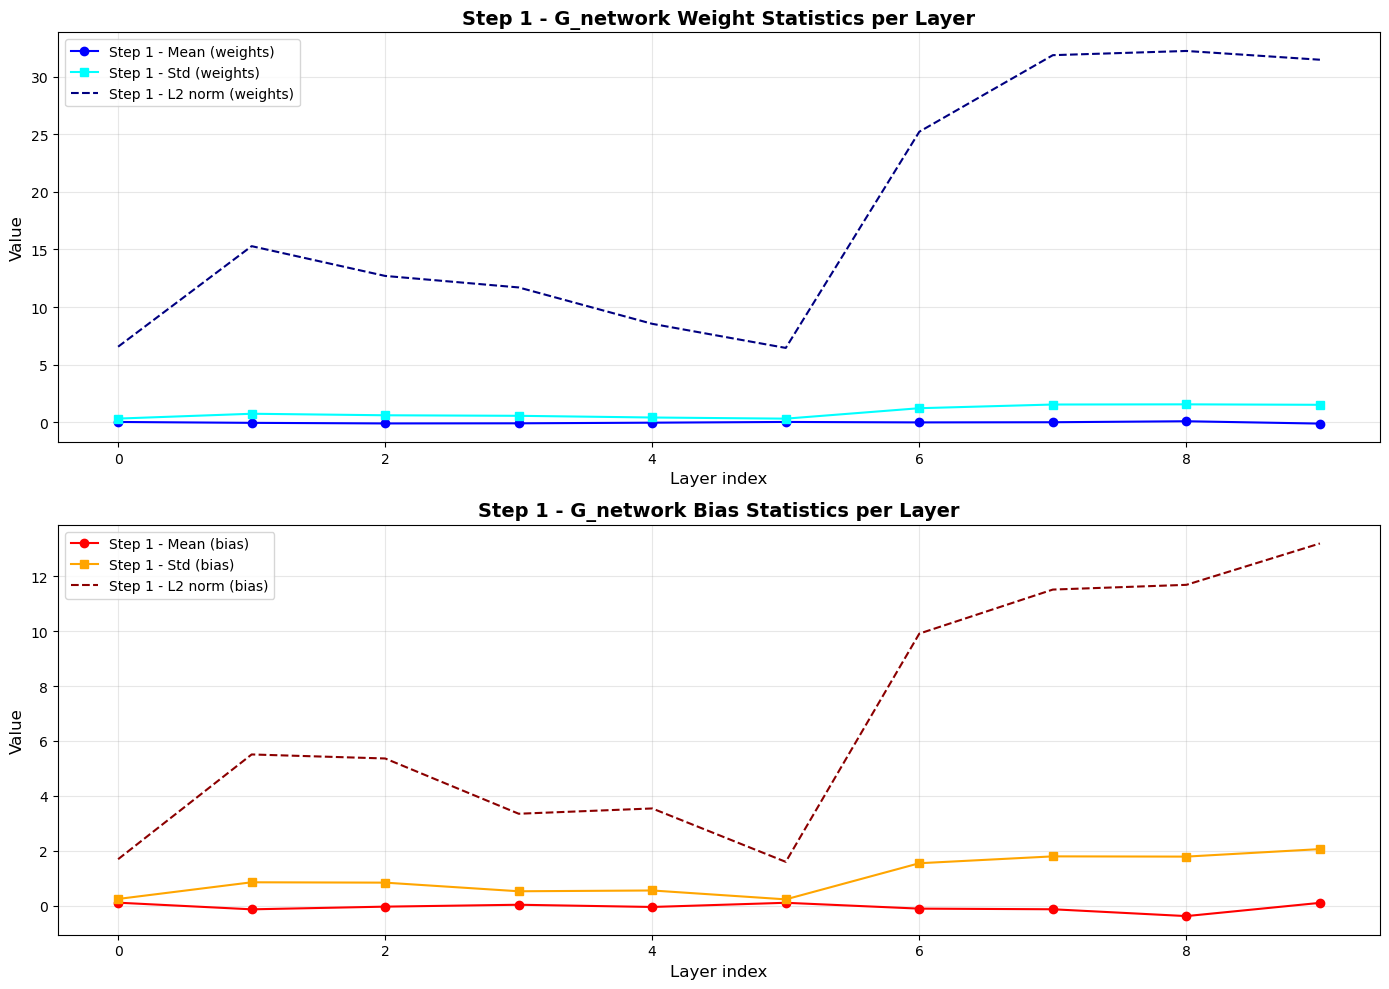

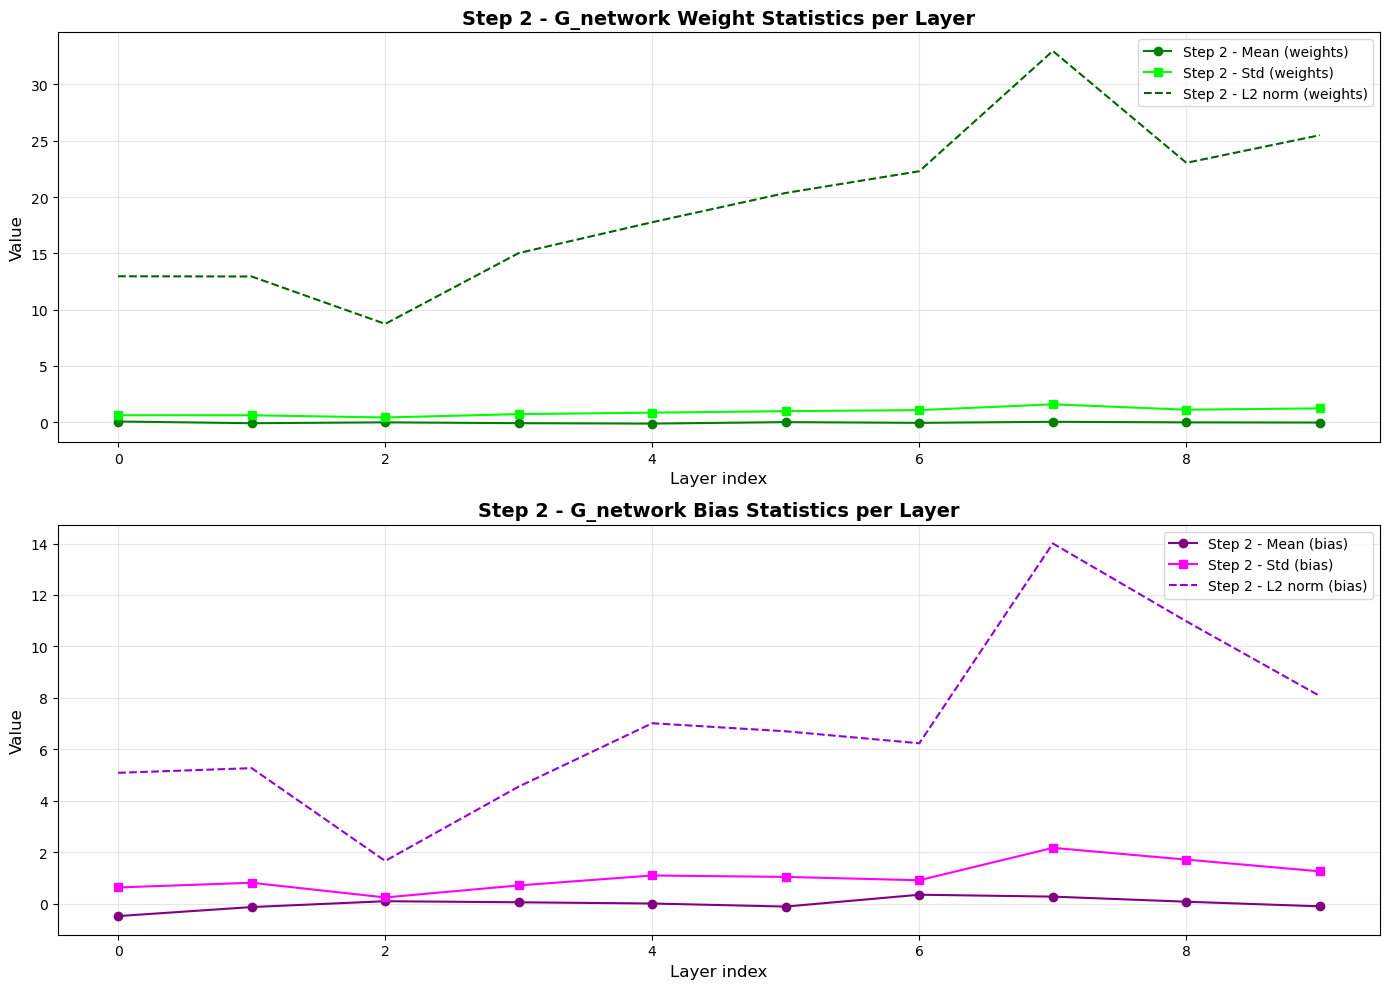

In [44]:
param_data = analyze_mapping_net(mapping_net, return_lists=True)


In [ ]:
    mapping_net_test = SimpleStackedHamiltonianNetwork(
        #Hpw many Step_1 + Step_2 layers to stack
        n_layers=1,
        # MLP Architecture parameters
        hidden_dims= [30, 60, 32],
        n_hidden_layers = None,   #Leave None if you provide list on hidden_dims
        
        # Activation parameters
        activation = 'gelu',
        activation_params = None,
        final_activation = None,   #Final layer activation function
        final_activation_only_on_final_layer = True,
        tanh_wrapper = False,
        
        # Initialization parameters
        weight_init = 'orthogonal',
        weight_init_params = {'gain': 1},
        bias_init = 'zeros',
        bias_init_value = 0.0,
        
        
        # Architectural choices
        use_bias = True,
        use_layer_norm = False,
        
        # Input/Output parameters
        input_dim = 2,  # x or u and t
        output_dim = 1,  # scalar G or F
        a_eps_min= 0.5,  # Minimum value for a
        a_eps_max= 2,  # Maximum value for a  
        a_k= 0.1,

        step_1_a_mean_innit= 1.0,
        step_2_a_mean_innit= 1.0,
        std_to_mean_ratio_a_mean_init= 0.3,

        step_1_gamma_mean_innit= 3.5,
        step_2_gamma_mean_innit= 2.5,
        std_to_mean_ratio_gamma_mean_init= 0.3,

        step_1_c1_mean_innit= 0.0,
        step_2_c1_mean_innit= 0.0,
        std_to_mean_ratio_c1_mean_init= 0.0,

        step_1_c2_mean_innit= 0.0,
        step_2_c2_mean_innit= 0.0,
        std_to_mean_ratio_c2_mean_init= 0.0,

        bound_innit=0.0,
    )
    

In [102]:
count_parameters(mapping_net_test)

8256

In [67]:
count_parameters(mapping_net_test)

15260